# **Car Prices in India Dataset**
## **PHASE 1 REPORT - Data Preperation and Visualization**

   Group Number - 11
 
 - Group Members and IDs
    * Aarav Jain - s3943906
    * Ahnaf Tausif - s3890097
    * Kushagra Baghel - s3882120
    * Mayank Deepak Thakkar - s3885003
    * Vishwas Aggarwal - s3859098

## Table of Contents

## Introduction <a id='itr'></a>

### Dataset Source

The Used Car Price in India Dataset used in this report was sourced from Kaggle(Avi Kaslival,2019). This dataset contains the information about the used car prices from 1998 to 2019.

### Dataset Information

This dataset contains all the information about used cars in India which is then used to predict car prices. The attributes in this dataset are fuel type, kilometers driven, mileage, power, engine, transmission type, year bought,owner type, number of seats. These features seem to be sufficient in order to predict the used car prices. The dataset has 9 features and a total of 6020 observations.

**Dataset Retrieval**

Read and Display 10 randomly selected rows from the dataset.

In [48]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")


In [49]:
df_grp11 = pd.read_csv('train-data.csv')

In [50]:
df_grp11.sample(10, random_state=999)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1940,1940,Skoda Fabia 1.2L Diesel Classic,Hyderabad,2010,66285,Diesel,Manual,First,19.5 kmpl,1199 CC,75 bhp,5.0,NaN,3.00
1416,1416,Fiat Linea Emotion,Kolkata,2010,39852,Petrol,Manual,First,16.0 kmpl,1368 CC,90 bhp,5.0,NaN,1.59
706,706,Mercedes-Benz E-Class 2015-2017 E250 CDI Avant...,Chennai,2017,34000,Diesel,Automatic,First,13.0 kmpl,2143 CC,204 bhp,5.0,NaN,36.00
1326,1326,Ford Ecosport 1.5 DV5 MT Titanium,Jaipur,2014,60000,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,NaN,5.75
1150,1150,Skoda Superb Elegance 1.8 TSI AT,Mumbai,2015,56073,Petrol,Automatic,First,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,13.25
2300,2300,Tata Safari DICOR 2.2 LX 4x2,Bangalore,2012,90000,Diesel,Manual,Second,13.93 kmpl,2179 CC,138.03 bhp,7.0,NaN,4.60
1094,1094,Maruti Vitara Brezza VDi,Kolkata,2017,35000,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,9.46 Lakh,6.50
762,762,Ford Figo Titanium Diesel,Kolkata,2015,72035,Diesel,Manual,First,25.5 kmpl,1498 CC,99 bhp,5.0,7.65 Lakh,2.50
3131,3131,Mahindra Xylo D2 BS III,Ahmedabad,2010,91596,Diesel,Manual,First,14.95 kmpl,2489 CC,93.7 bhp,7.0,NaN,1.85
2851,2851,Renault KWID 1.0 RXT Optional,Kochi,2018,18335,Petrol,Manual,First,21.7 kmpl,999 CC,67 bhp,5.0,4.61 Lakh,4.50


### Dataset Features 

Here are the various features of the dataset in a tabular form. They are also described in the Kagle dataset.

In [51]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Name', 'Nominal Categorical', 'NA', 'Name of the Car'],
         ['Location', 'Nominal Categorical', 'NA', 'The city where the car was bought'],
         ['Year', 'Numeric', 'NA', 'Year in which car was bought'],
         ['Kilometers_Driven', 'Numeric', 'Kilometers(km)', 'Distance the car is driven in kms '],
         ['Fuel_Type', 'Nominal Categorical', 'NA', 'Type of fuel used in the car - CNG / Petrol / Diesel'],
         ['Transmission', 'Binary', 'NA', 'Type of transmission the car has - Manual / Automatic'],
         ['Owner_Type', 'Nominal_Categorical', 'NA', 'How many owners the car has had earlier and the number of owmer now'],
         ['Mileage', 'Numeric', 'Kilometer/litre (kmpl)', 'The mileage of the car'],
         ['Engine', 'Numeric', 'Cubic Capacity (CC)', 'CC of the engine'],
         ['Power', 'Numeric', 'Break Horse Power (BHP)', '0 -  is not newly built and 1 - is newly built'],
         ['Seats', 'Numeric', 'NA', 'Number of seats the car has'],
         ['New_Price', 'Numeric', 'NA', 'New price of the car in Indian Rupees'],
         ['Price', 'Numeric', 'NA', 'Price of the car in Indian Rupees']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═════════════════════╤═════════════════════════╤═════════════════════════════════════════════════════════════════════╕
│ Name              │ Data Type           │ Units                   │ Description                                                         │
╞═══════════════════╪═════════════════════╪═════════════════════════╪═════════════════════════════════════════════════════════════════════╡
│ Name              │ Nominal Categorical │ NA                      │ Name of the Car                                                     │
├───────────────────┼─────────────────────┼─────────────────────────┼─────────────────────────────────────────────────────────────────────┤
│ Location          │ Nominal Categorical │ NA                      │ The city where the car was bought                                   │
├───────────────────┼─────────────────────┼─────────────────────────┼─────────────────────────────────────────────────────────────────────┤
│ Year              

### Target Feature

For this report, the target feature will be the price of cars in the metropolitan cities of India. It will be predicted by using the descriptive variables and statistics for data exploration and visualisation.

## Goals and Objectives

India is one of the 2nd most populous countries with a population of 1.3 billion. It has a prodigious automotive industry and based on the latest statistic(https://www.statista.com/statistics/664729/total-number-of-vehicles-india/) India has around 296 million registered vehicles. Thus a model that can predict car prices of used as well as new cars has a lot of real world use in this industry. 

We want our model to predict the car prices on the basis of attributes like kilometer driven, transmission type, owner type, mileage, engine, power and the capacity of the vehicle. We also aim to perform some data analysis to accurately predict the car prices by using modules like matplotlib and seaborn in order to explore and visualize data.

## Data Cleaning and Preprocessing

We will be performing data cleaning and preprocessing in which we will 

*  Drop irrelevant features
*  Check for missing values and remove the respective rows
*  Random sampling of the dataset for 500 rows

We will start by displaying all the columns of our dataset and checking it's shape

In [52]:
df_grp11.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [53]:
df_grp11.shape

(6019, 14)

Here we can see that the first column 'Unnamed: 0' has no use in predicting the car price. Similarly 'Name', also has no such use.'New_Price' will also be removed as it has multiple missing values.

In [54]:
df_grp11 = df_grp11.drop(columns=["Unnamed: 0","New_Price", "Name"]) 

The dataset has a consistent naming format and has proper spacing. Thus no changes need to be made in this regard.

Now we will crosscheck whether the dataset has correct datatypes associated with it's attributes.

In [55]:
print('The datatypes are:')
print(df_grp11.dtypes)

The datatypes are:
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


As we can see, the datatypes are correct

Now  we will display the unique values for all categorical data types as well as numerical data types.

In [56]:
print("Summary of categorical featues")
df_grp11.describe(include='object').T

Summary of categorical featues


,count,unique,top,freq
Location,6019,11,Mumbai,790
Fuel_Type,6019,5,Diesel,3205
Transmission,6019,2,Manual,4299
Owner_Type,6019,4,First,4929
Mileage,6017,443,17.0 kmpl,172
Engine,5983,146,1197 CC,606
Power,5983,372,74 bhp,235


In [57]:
print("Summary of numerical features")
df_grp11.describe(include=['int64','float64']).T

Summary of numerical features


,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


Now we will check for any missing values by checking the number of missing values in every column 

In [58]:
print("The missing values are:")
print(df_grp11.isnull().sum())

The missing values are:
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64


As we can see above that there are missing values in the columns 'Mileage', 'Engine', 'Power' and 'Seats'. We will drop the observations with the missing values

In [59]:
df_grp11 = df_grp11.dropna()

Now we will check whether the rows with the missing values were dropped

In [60]:
print(df_grp11.isnull().sum())

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


Now we will check the shape of the dataset after cleaning and postprocessing

In [61]:
df_grp11.shape

(5975, 11)

### Random Sampling

Now we will do a random sampling of 500 rows out of 5975 rows. We will display 5 random rows out of the random sample of 500

In [62]:
df_grp11 = df_grp11.sample(n=500, random_state=999)
df_grp11.sample(5, random_state=999)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4727,Kolkata,2013,55886,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,7.25
2713,Ahmedabad,2008,45000,Diesel,Automatic,Second,16.77 kmpl,2967 CC,241.38 bhp,5.0,11.50
385,Mumbai,2016,28000,Petrol,Manual,First,17.8 kmpl,1497 CC,117.3 bhp,5.0,8.75
1758,Chennai,2011,37442,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,3.40
1569,Pune,2016,27300,Petrol,Manual,First,17.8 kmpl,1497 CC,117.3 bhp,5.0,7.00


## Data Exploration and Visualisation

We can now start working on visualizing the data as we finished cleaning up the dataset

### Univariate Visualisation

We can visualise what our features look like.

#### Bar Chart  of Location Name

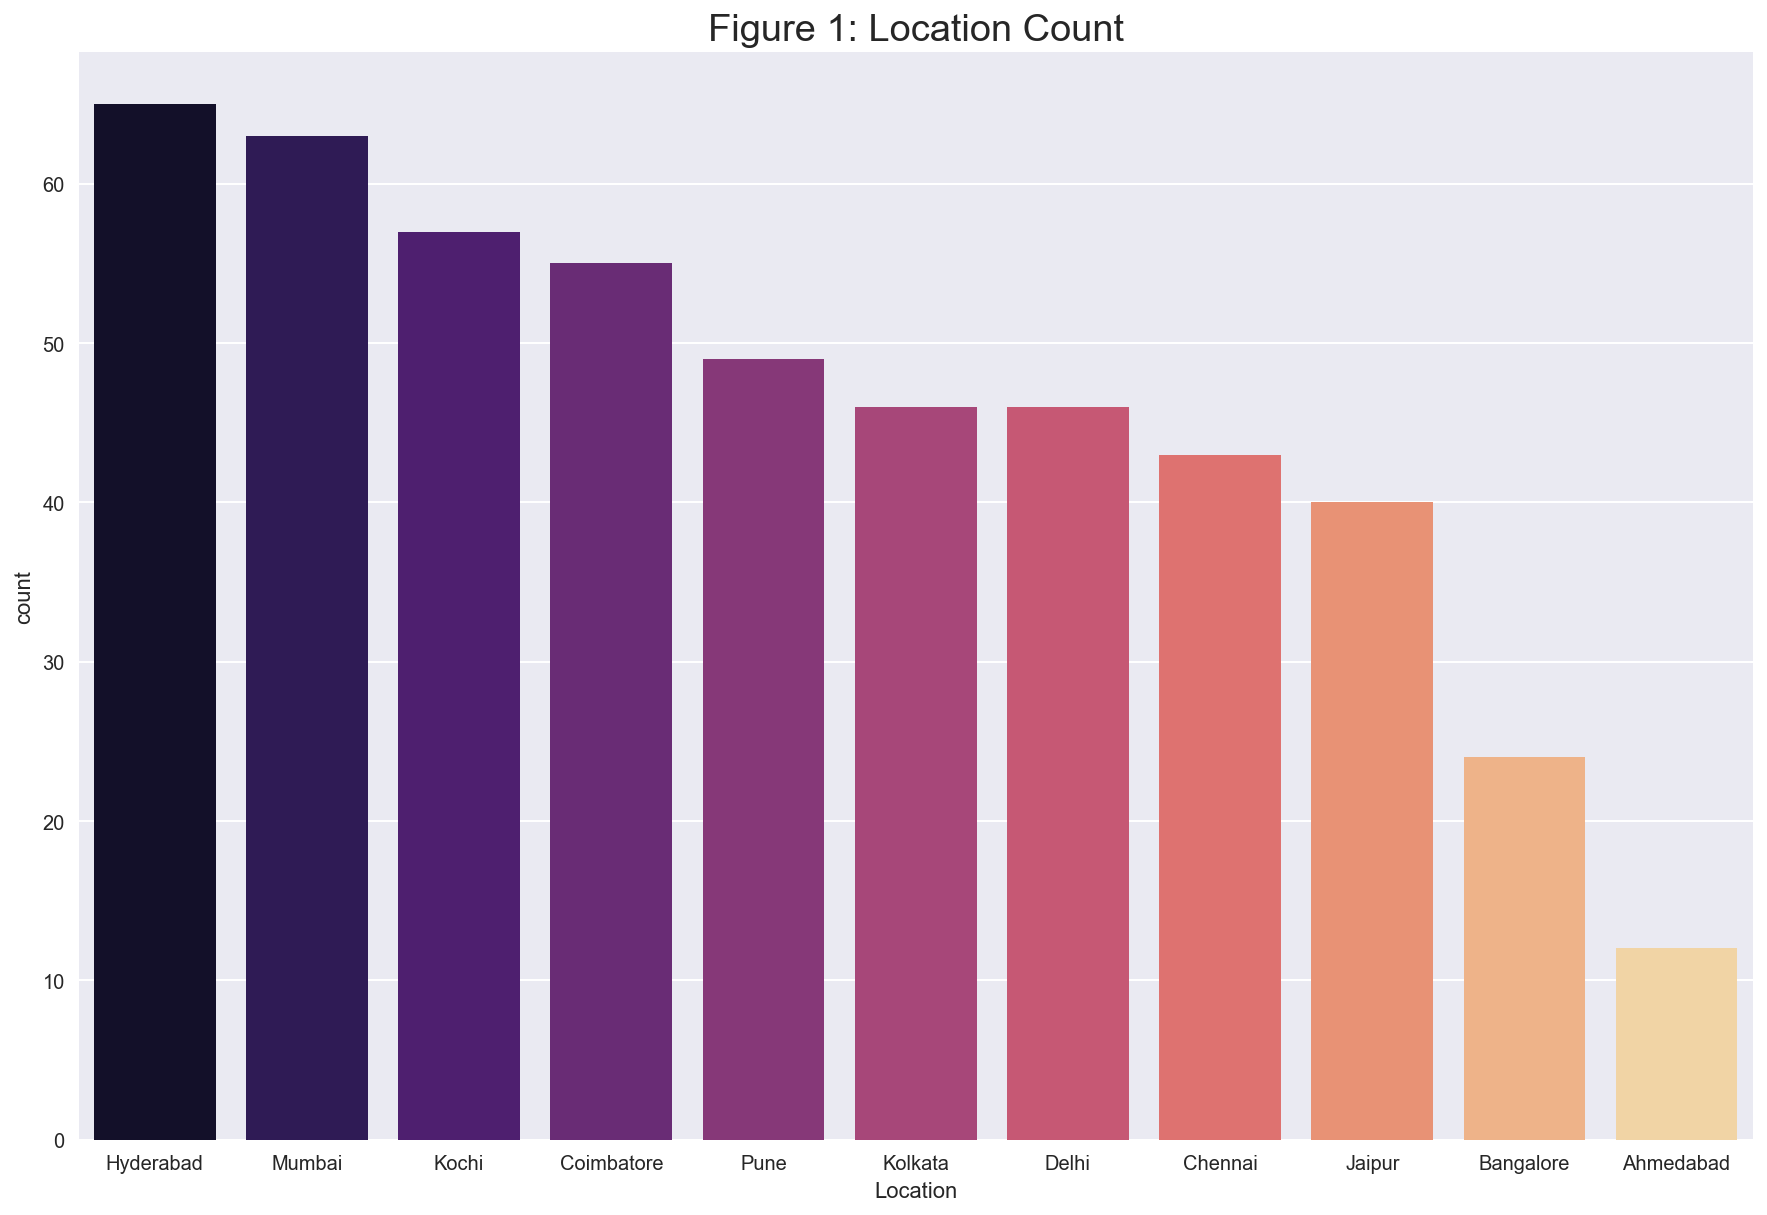

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,10))
fig = sns.countplot(x = 'Location', data = df_grp11, palette = 'magma', order = df_grp11['Location'].value_counts().index)
fig = plt.title('Figure 1: Location Count', fontsize = 19)
plt.show()

#### Bar Chart of Fuel Type


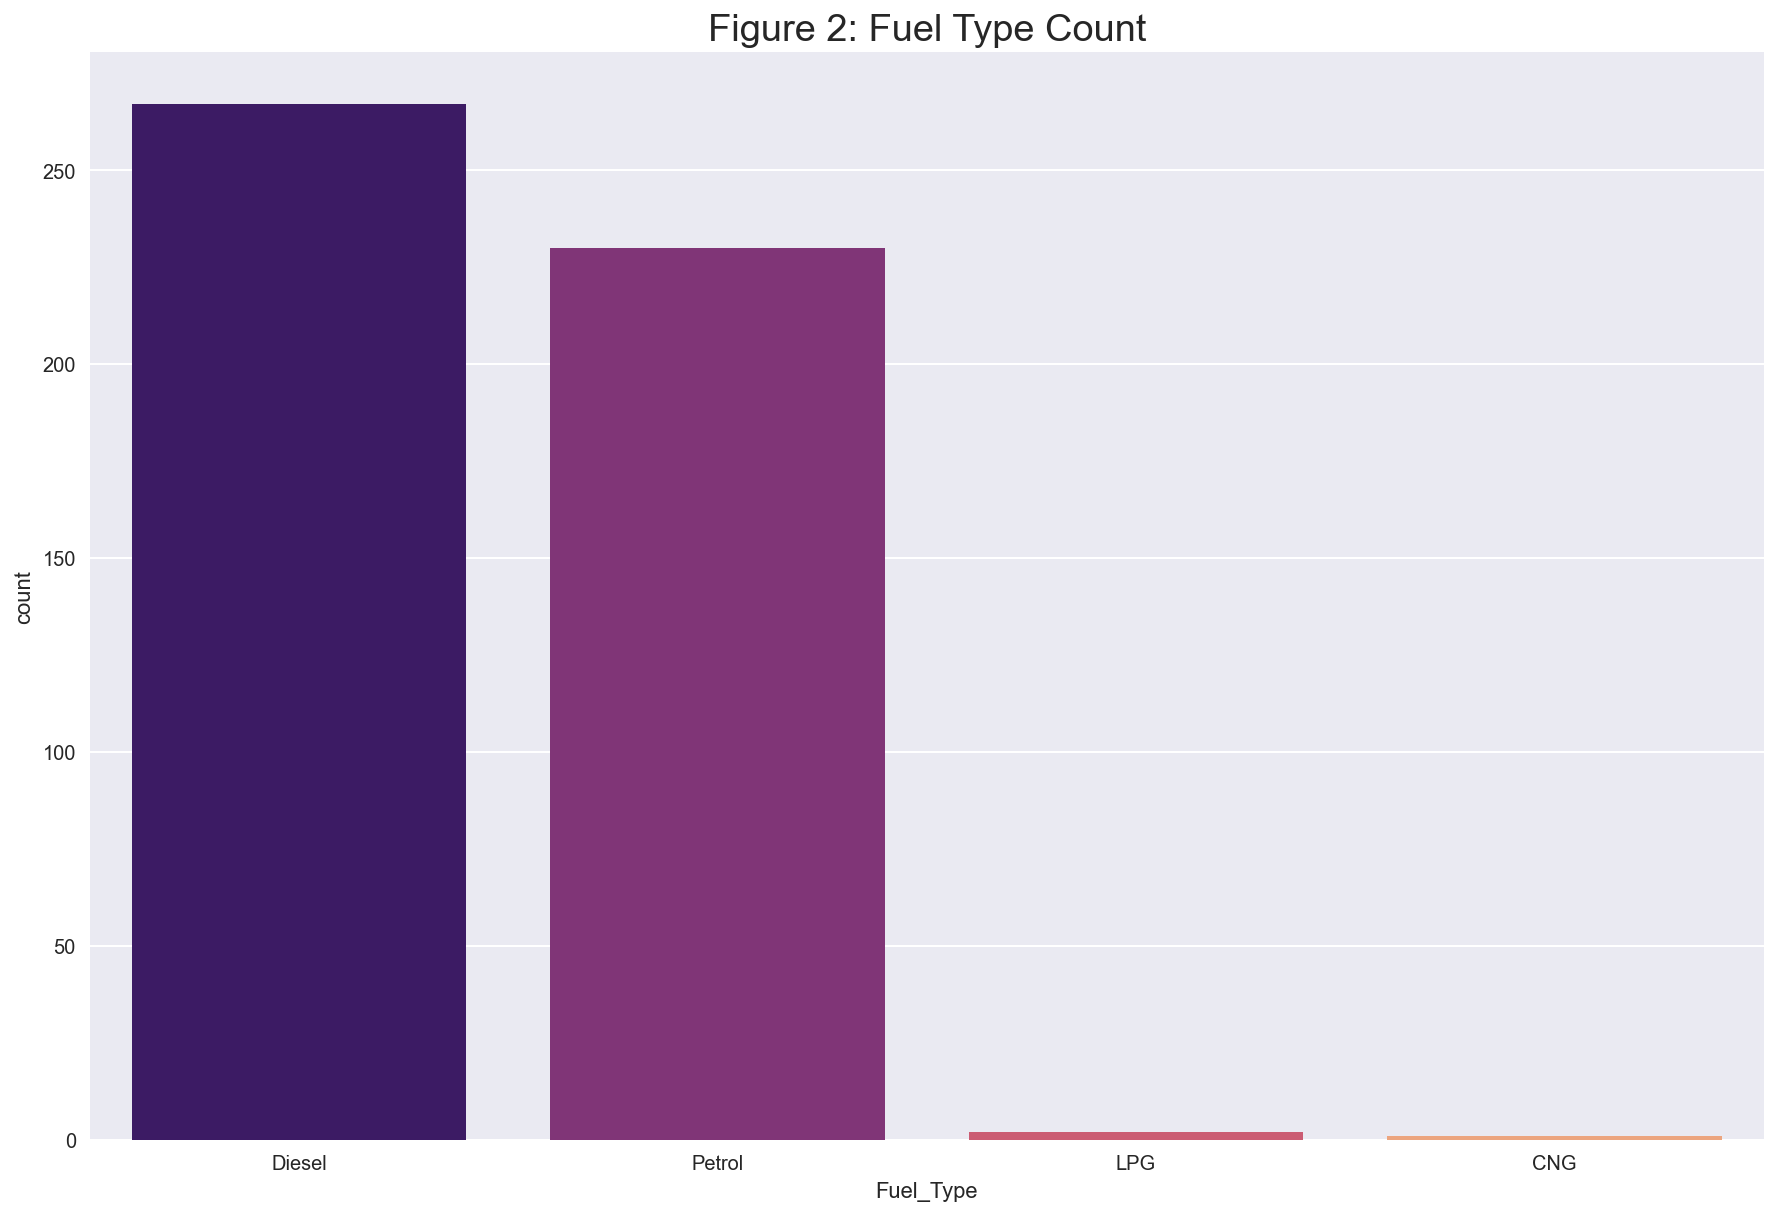

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 10))
fig = sns.countplot(x = 'Fuel_Type', data = df_grp11, palette = 'magma', 
                    order = df_grp11['Fuel_Type'].value_counts().index)
fig = plt.title('Figure 2: Fuel Type Count', fontsize = 19)
plt.show()

#### Boxplot & Histogram of Price

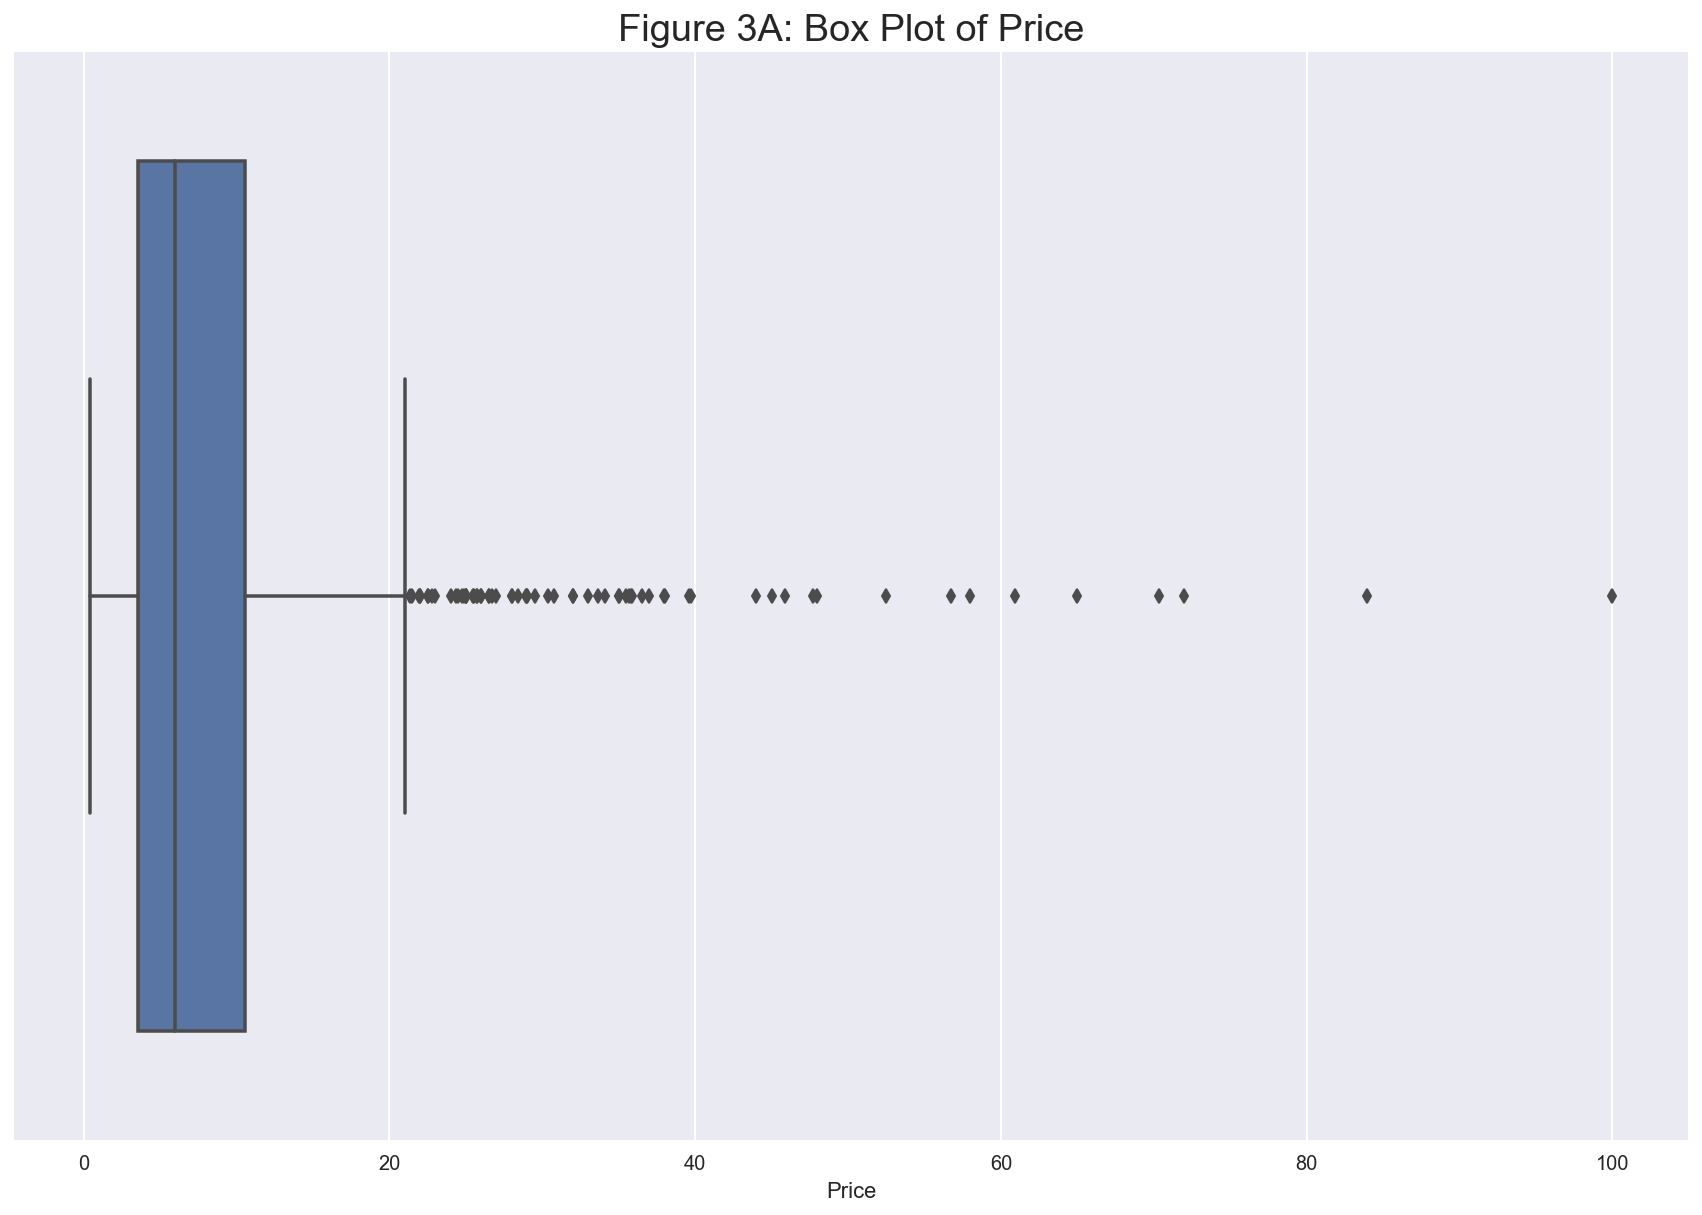

In [76]:
# Boxplot of Price
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,10))
sns.boxplot(df_grp11['Price']).set_title('Figure 3A: Box Plot of Price', fontsize = 19)
plt.show()

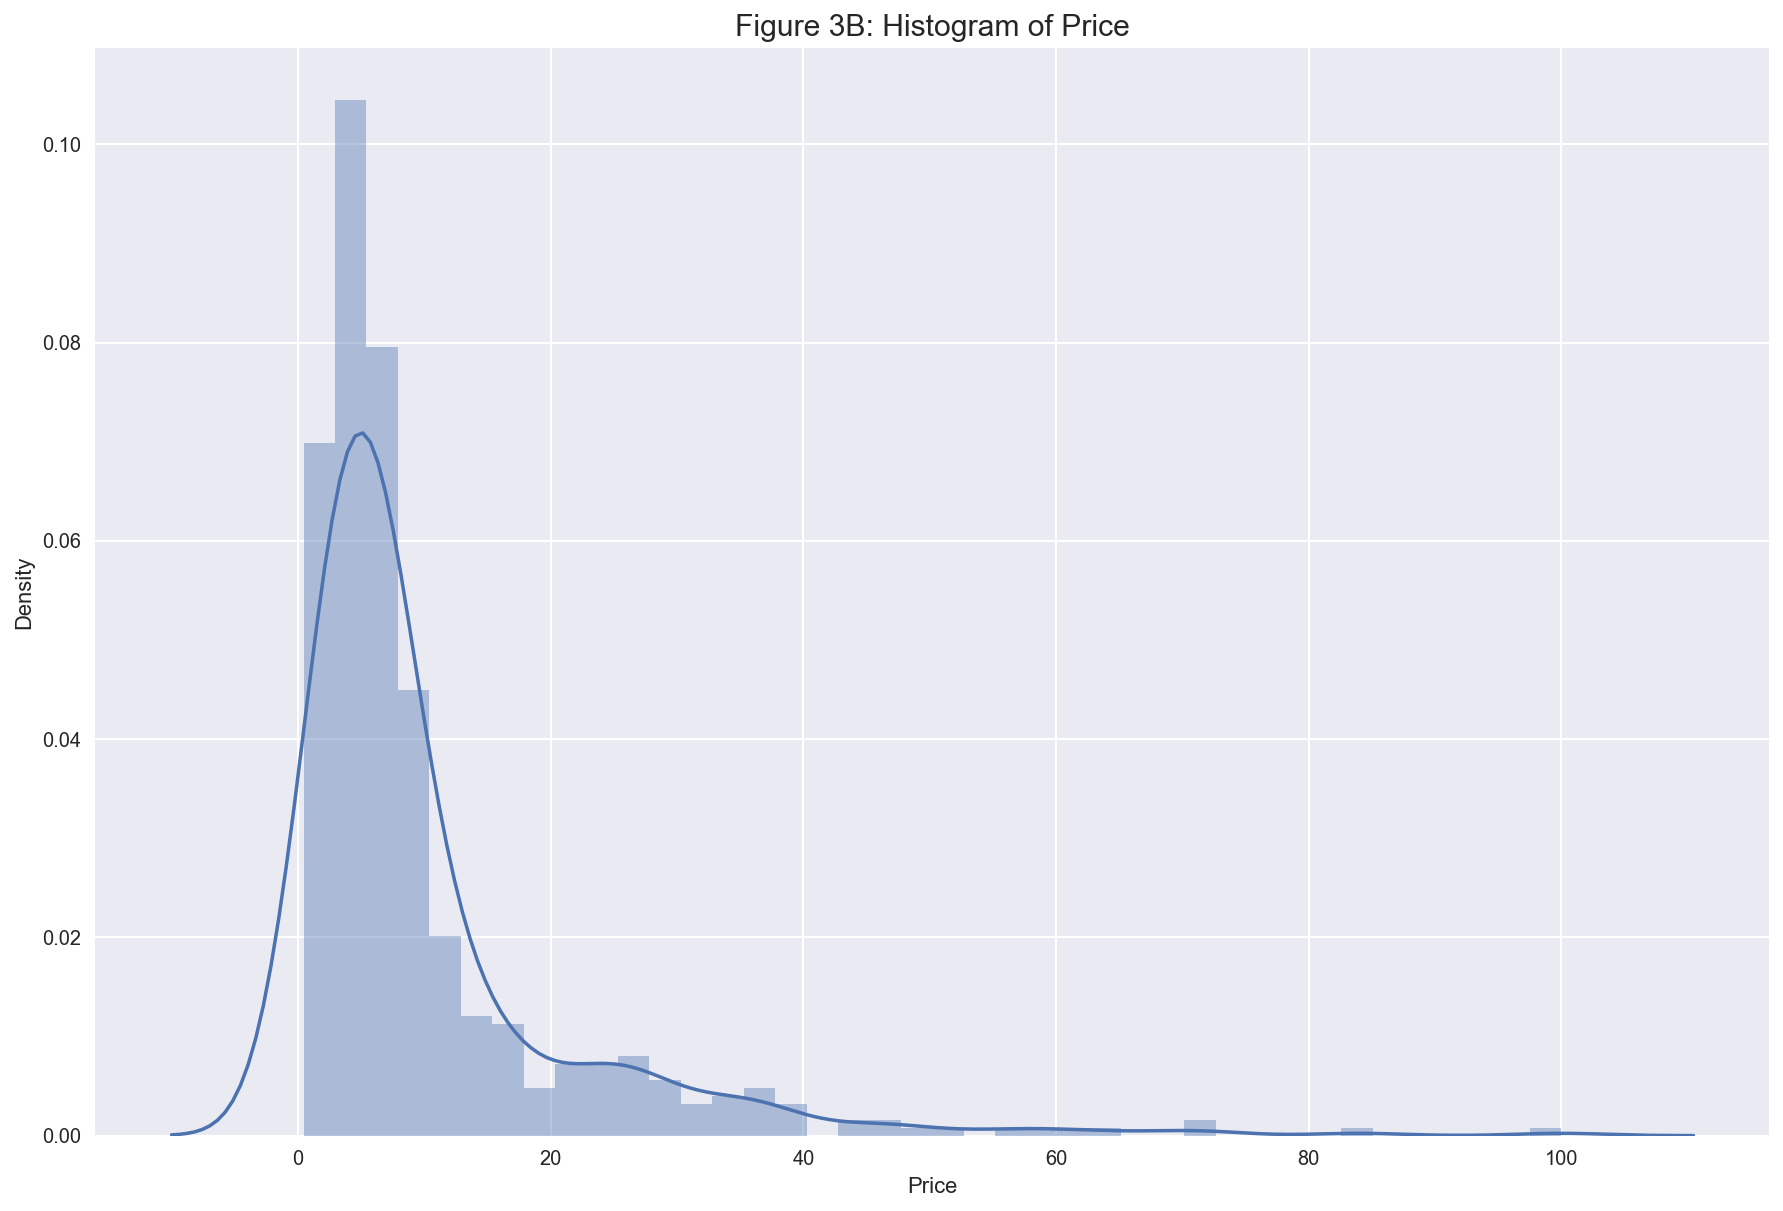

In [77]:
# Boxplot of Price
plt.figure(figsize = (15,10))
sns.distplot(df_grp11['Price'], kde=True, bins=40).set_title('Figure 3B: Histogram of Price', fontsize = 15)
plt.show()

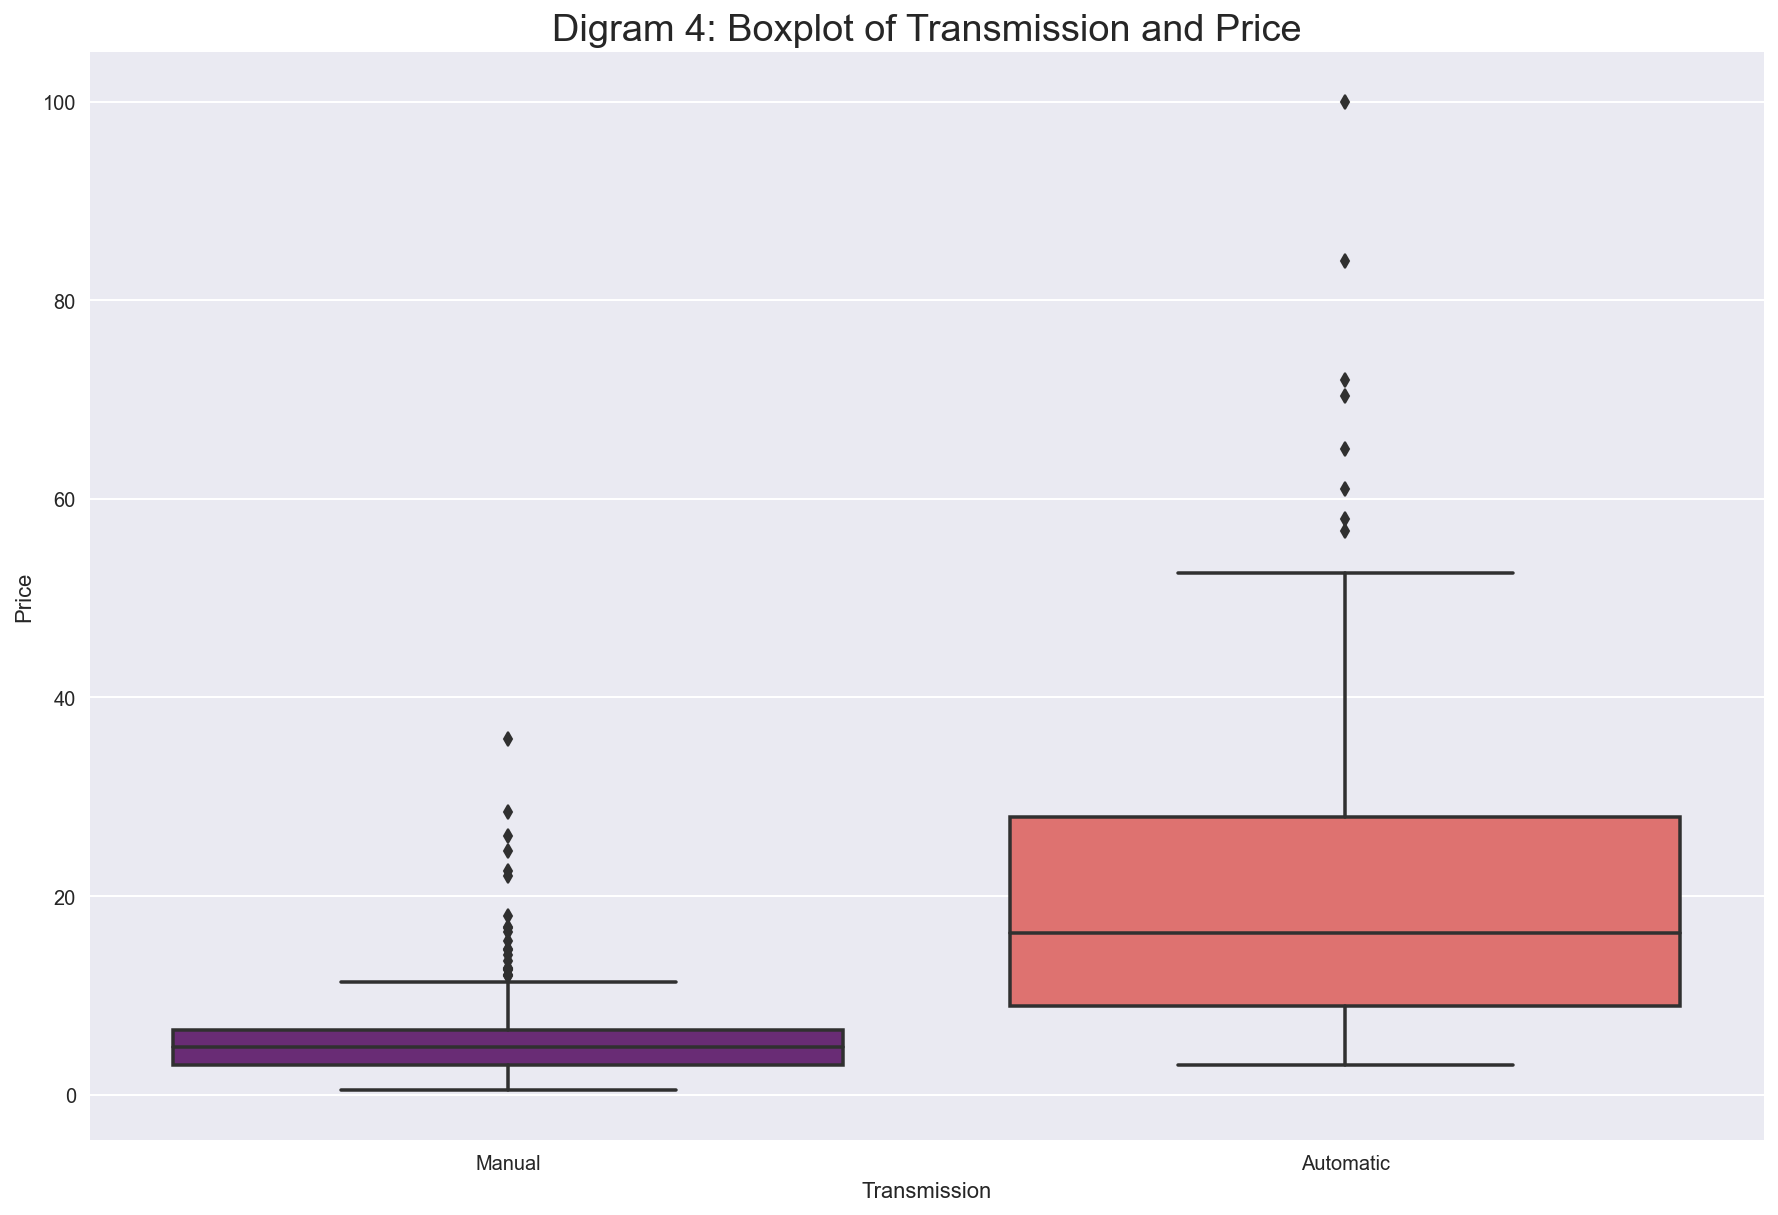

In [78]:

plt.figure(figsize = (15,10))
sns.boxplot(x=df_grp11['Transmission'], y=df_grp11['Price'] , palette ="magma");
plt.title('Digram 4: Boxplot of Transmission and Price', fontsize = 19)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show();

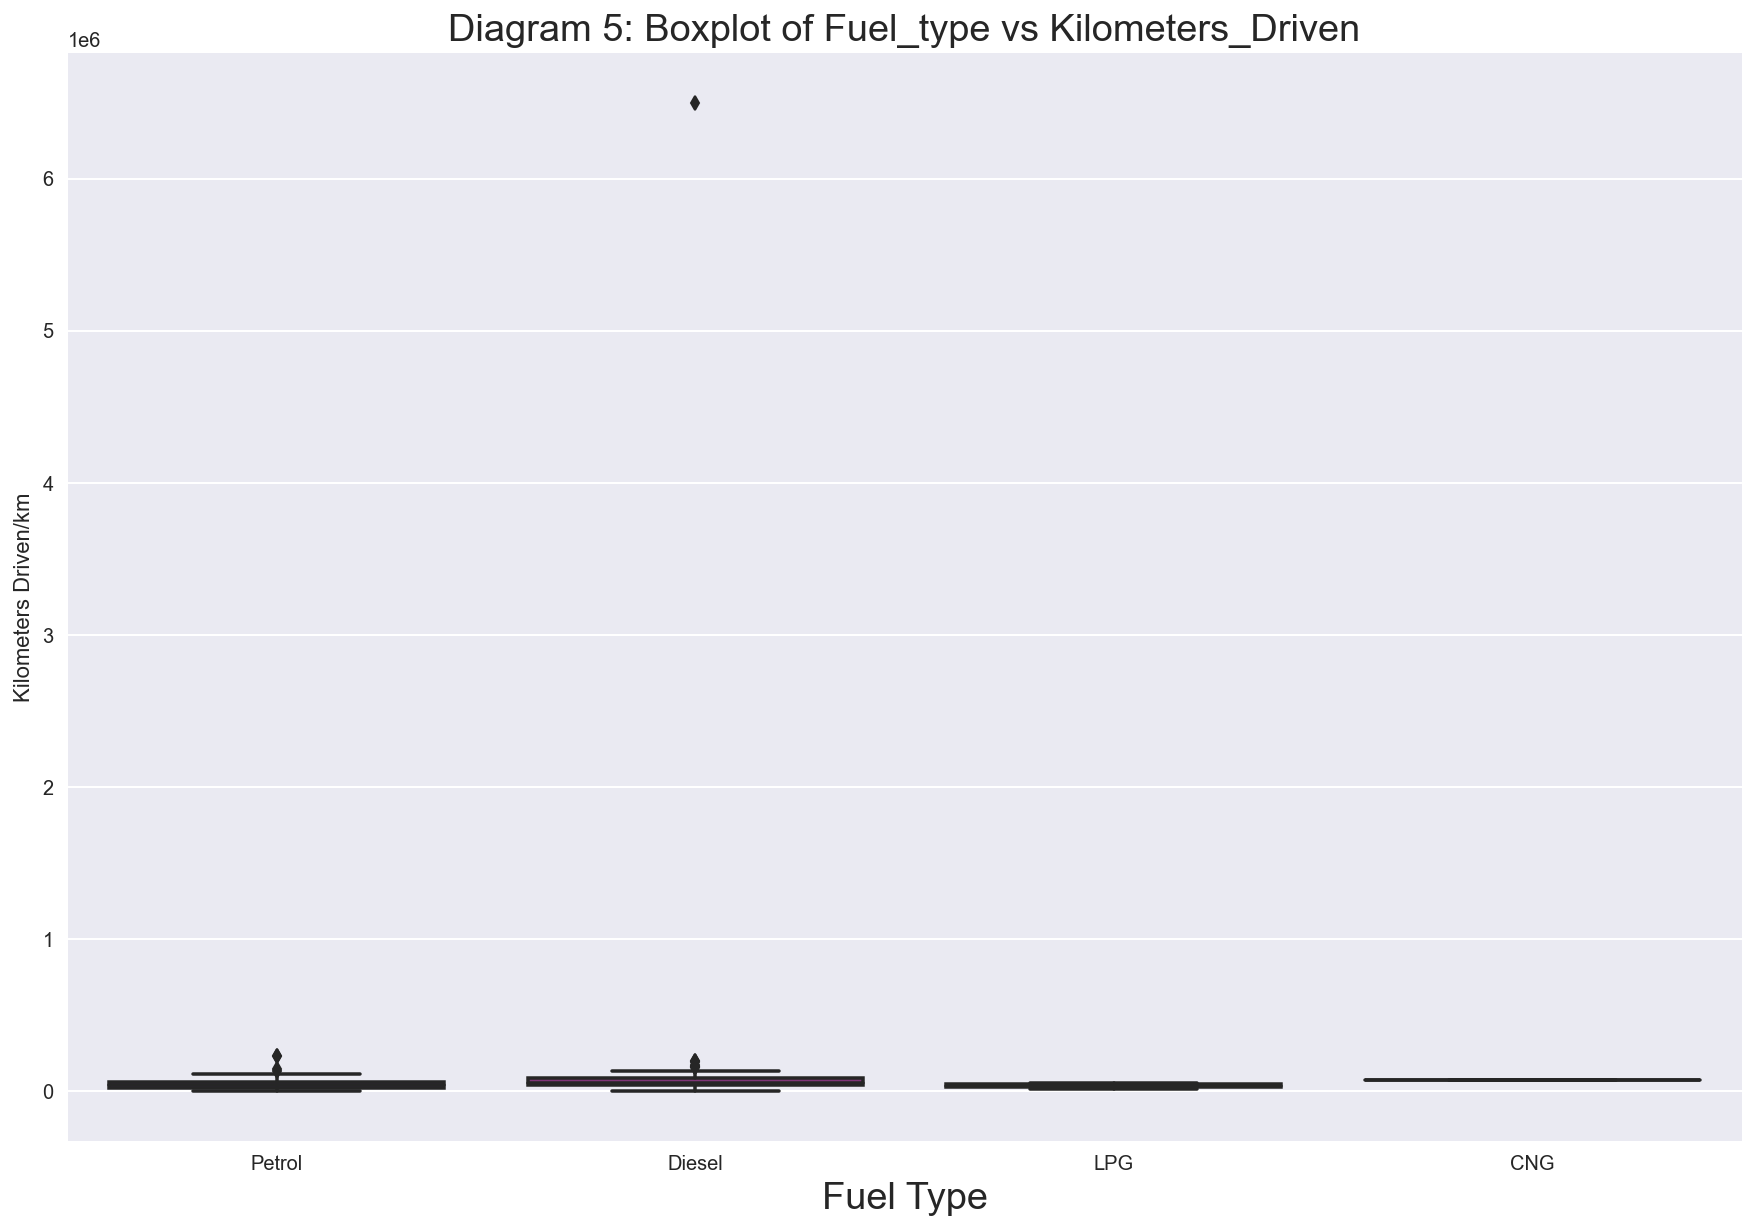

In [79]:
plt.figure(figsize = (15,10))
sns.boxplot(x= df_grp11['Fuel_Type'],y= df_grp11['Kilometers_Driven'],palette ="magma");
plt.title('Diagram 5: Boxplot of Fuel_type vs Kilometers_Driven', fontsize = 19)
plt.xlabel("Fuel Type",fontsize=19)
plt.ylabel("Kilometers Driven/km")
plt.show();

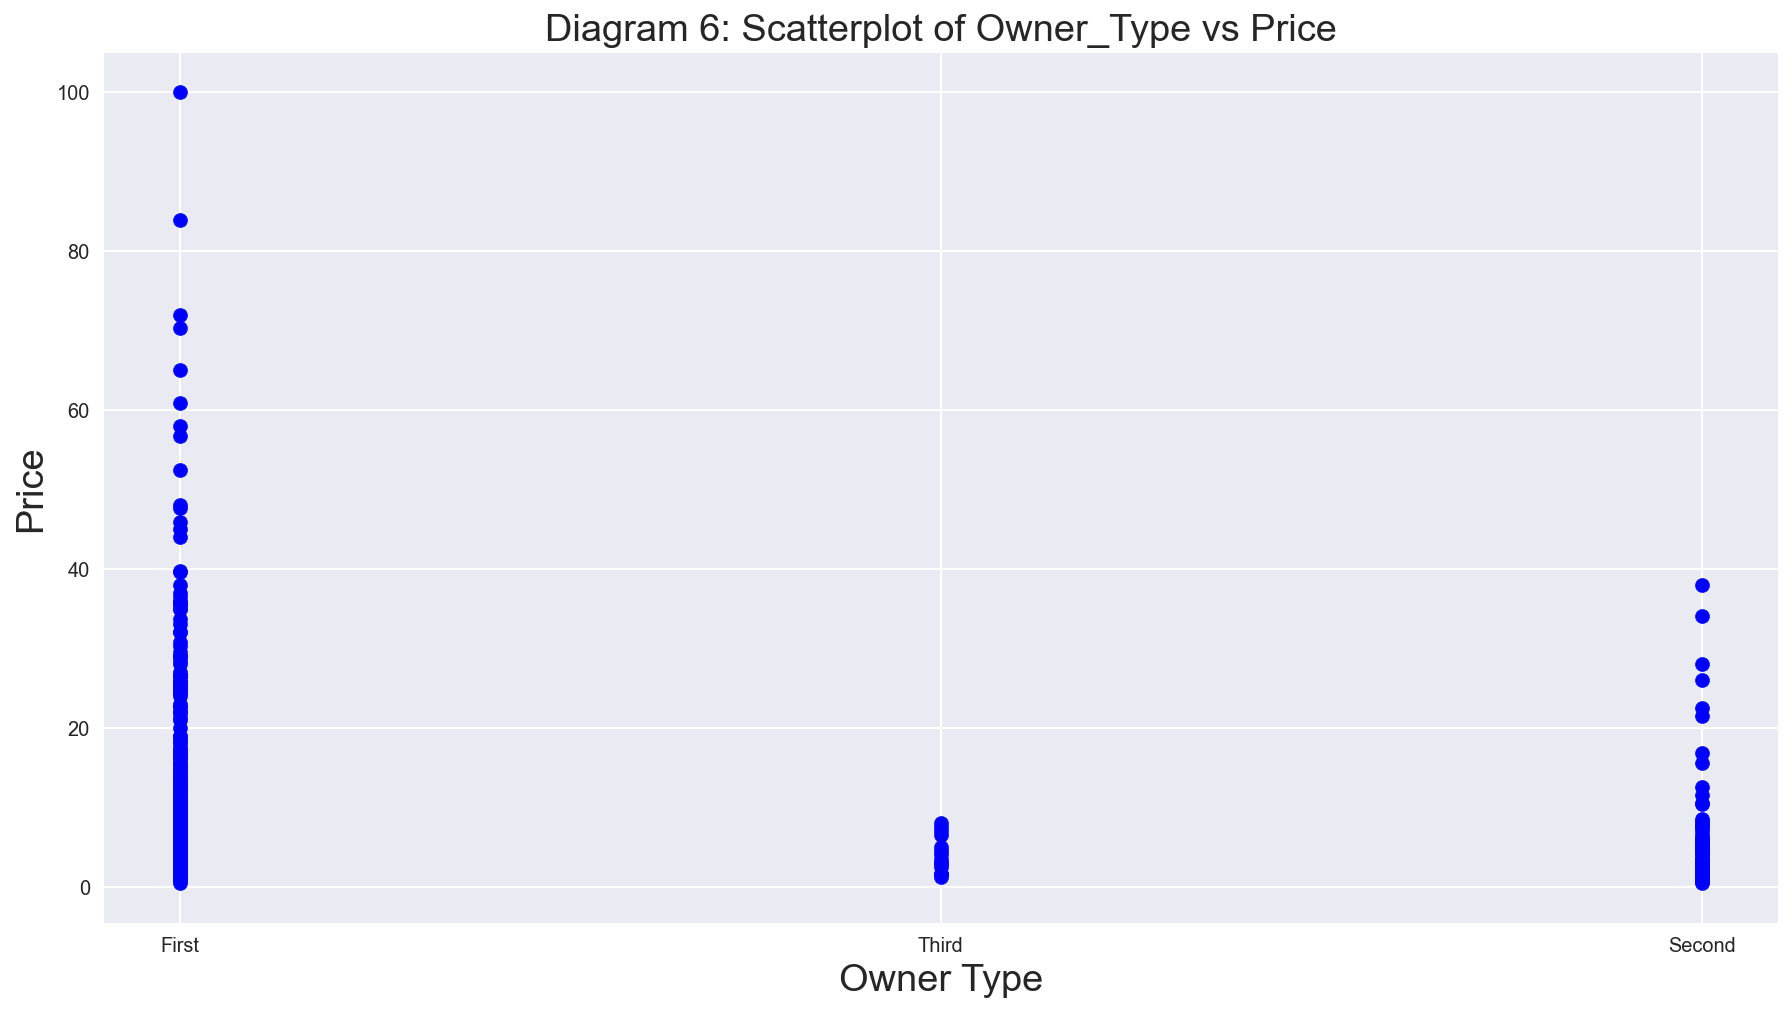

In [80]:
plt.figure(figsize = (15,8))
plt.scatter(x=df_grp11['Owner_Type'],y= df_grp11['Price'], alpha = 1.0, color="blue")
plt.title('Diagram 6: Scatterplot of Owner_Type vs Price', fontsize = 19)
plt.xlabel('Owner Type',fontsize = 19)
plt.ylabel('Price',fontsize = 19)
plt.show();

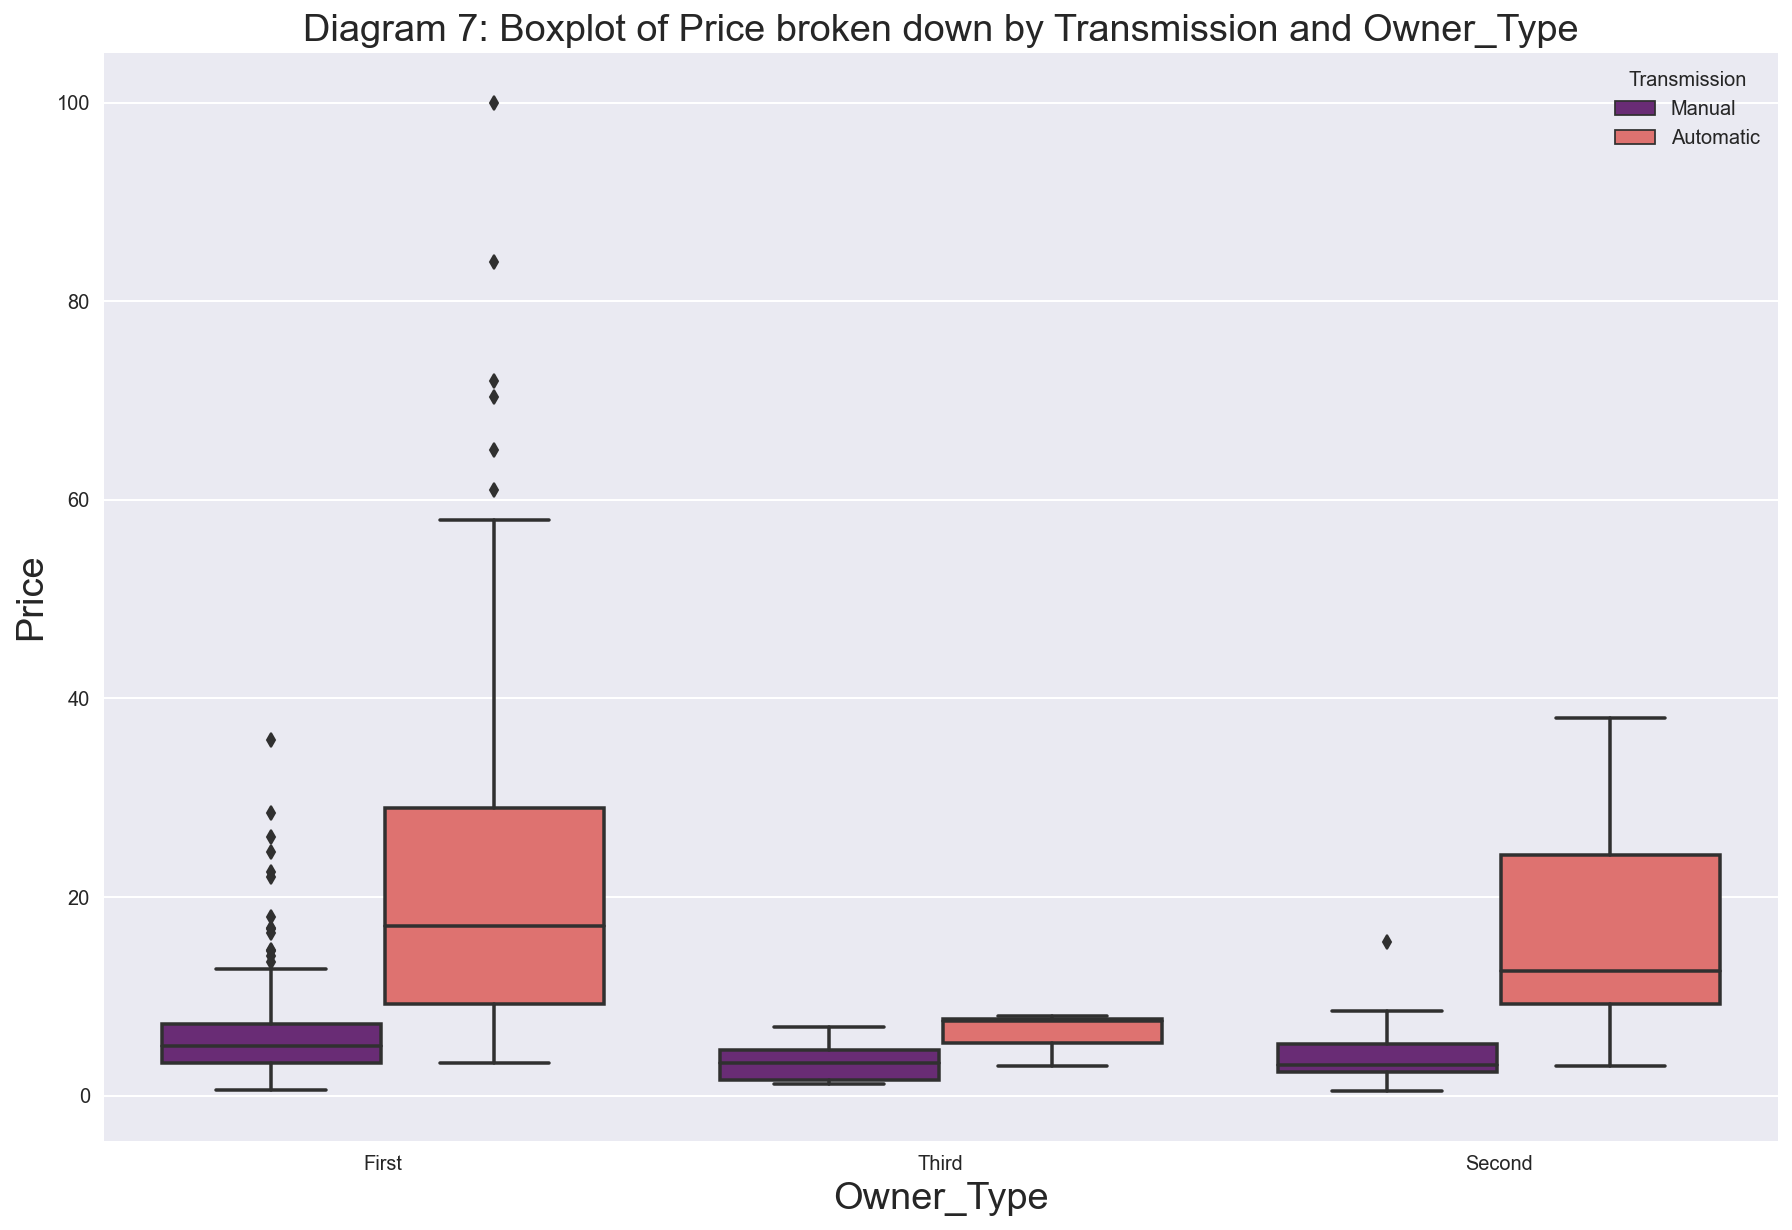

In [82]:
plt.figure(figsize = (15,10))
sns.boxplot(x=df_grp11["Owner_Type"] , y= df_grp11["Price"] , hue = df_grp11["Transmission"] , palette="magma" )
plt.title('Diagram 7: Boxplot of Price broken down by Transmission and Owner_Type', fontsize = 19)
plt.xlabel("Owner_Type", fontsize= 19)
plt.ylabel("Price", fontsize = 19)
plt.show();

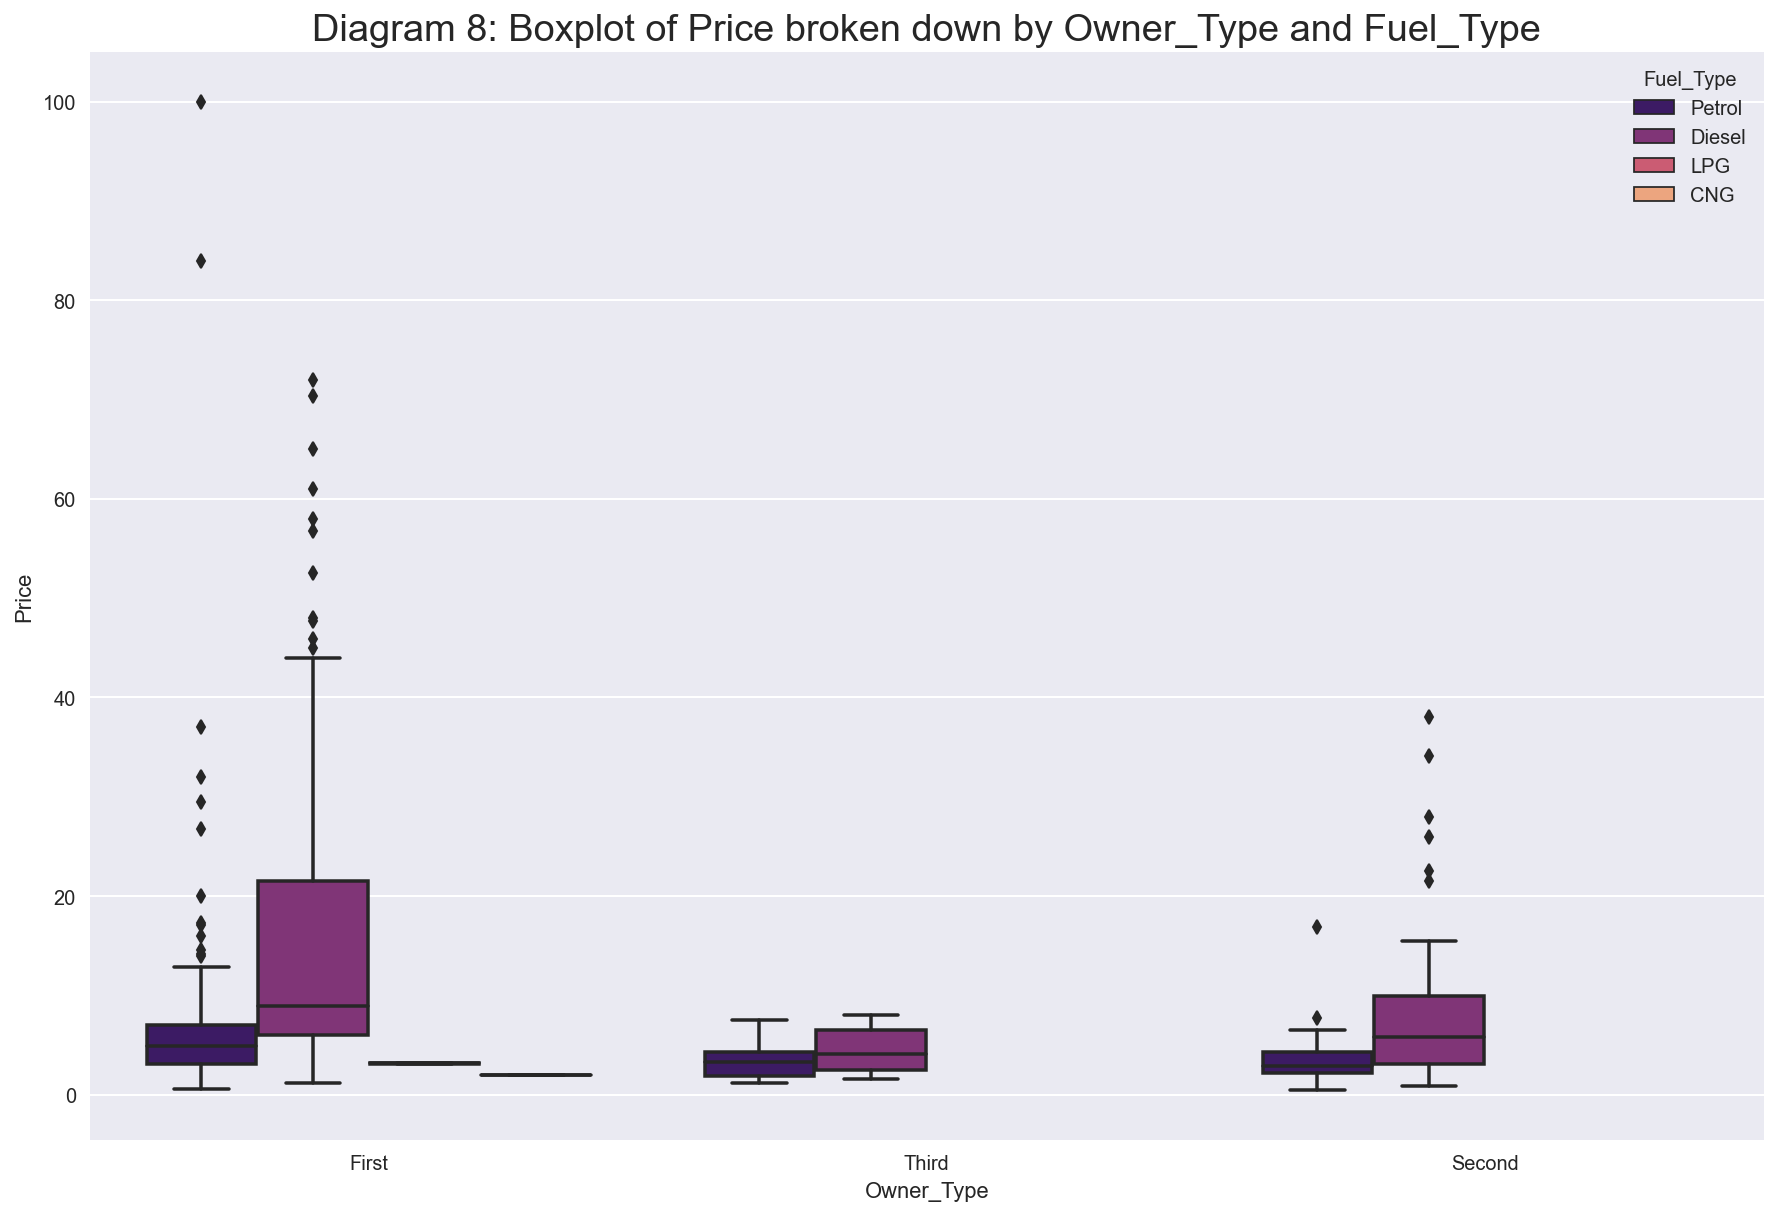

In [83]:
plt.figure(figsize = (15,10))
sns.boxplot( x= df_grp11['Owner_Type'], y= df_grp11['Price'], hue = df_grp11['Fuel_Type'] ,palette="magma")
plt.title('Diagram 8: Boxplot of Price broken down by Owner_Type and Fuel_Type', fontsize = 19)
plt.xlabel("Owner_Type")
plt.ylabel("Price")
plt.show();

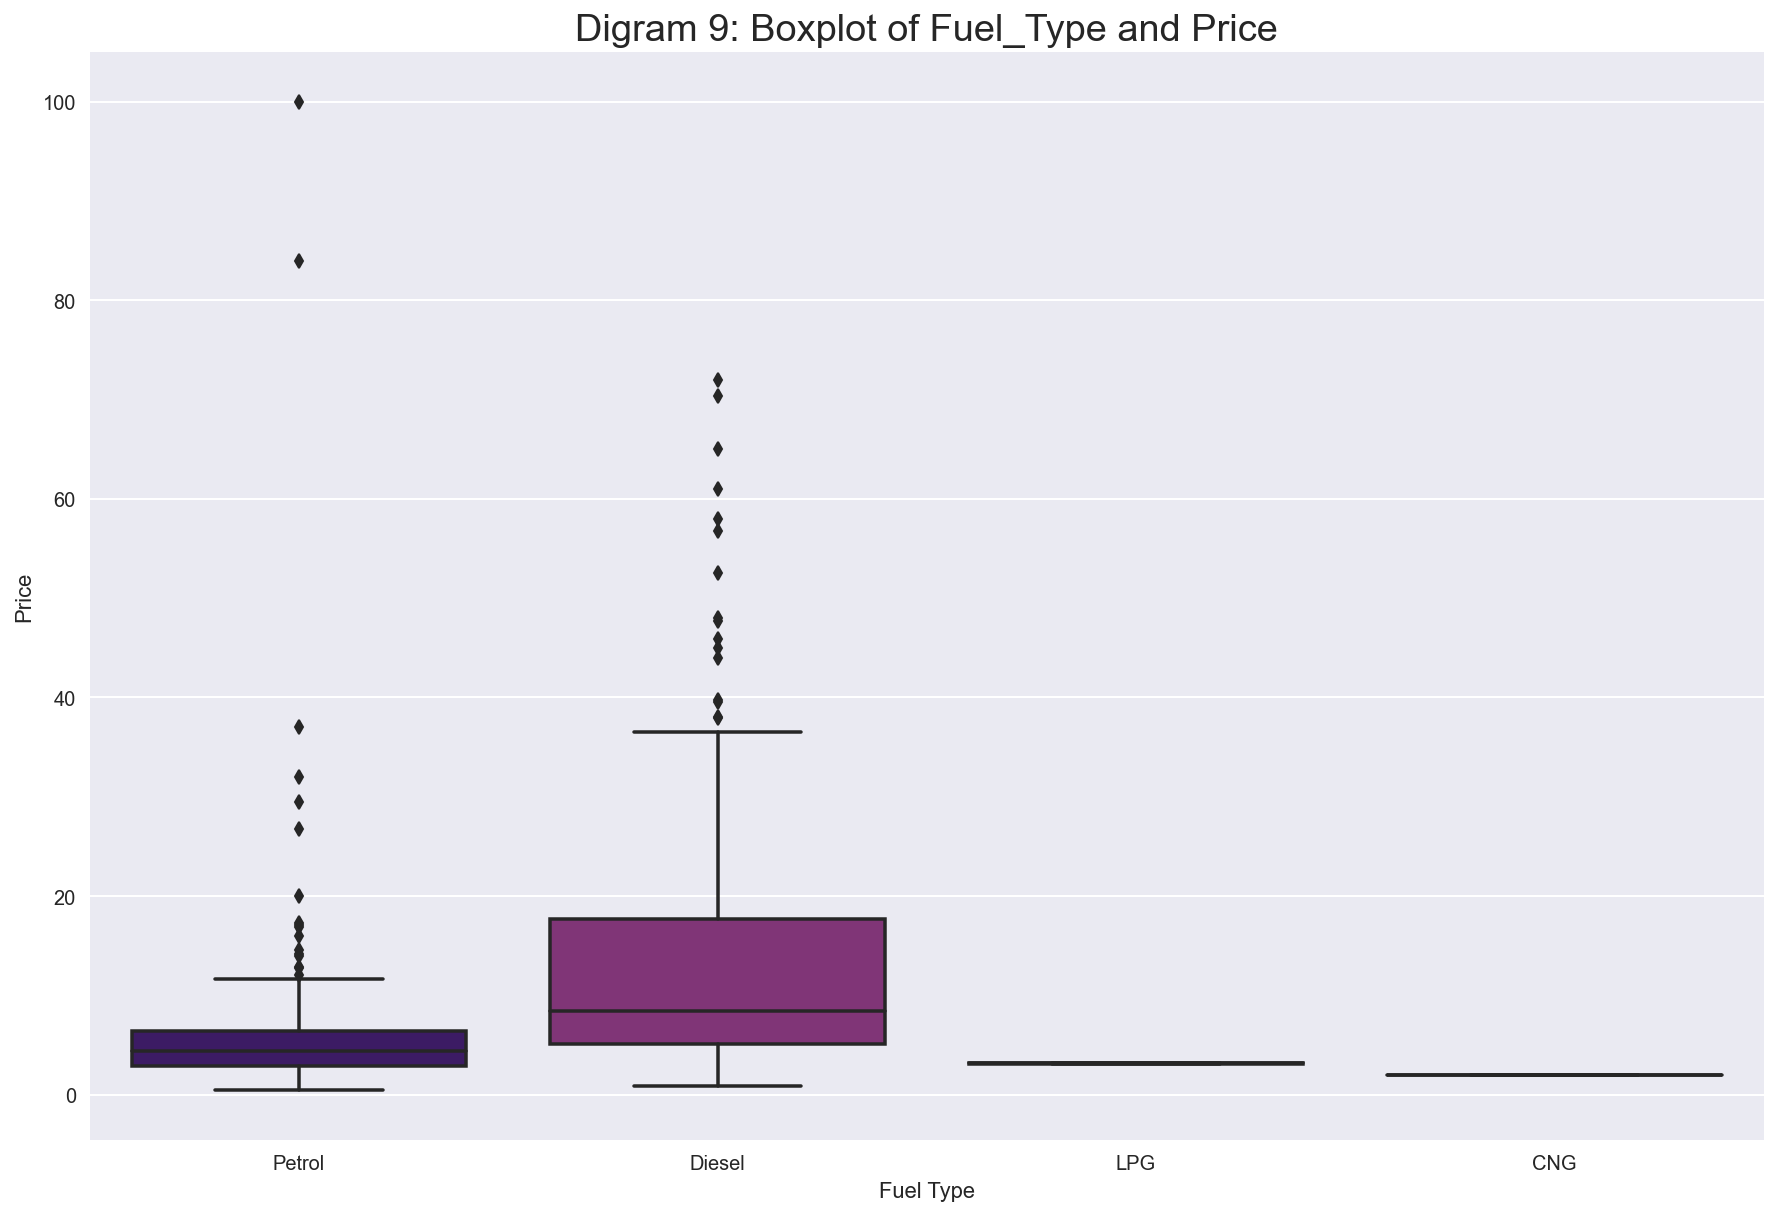

In [85]:
plt.figure(figsize = (15,10))
sns.boxplot(x=df_grp11['Fuel_Type'], y=df_grp11['Price'] , palette ="magma");
plt.title('Digram 9: Boxplot of Fuel_Type and Price', fontsize = 19)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show();

# SUMMARY AND CONCLUSION

- According to the cars count on the basis of the location, Hyderabad leads the table and Ahmedabad has the least count.
- The majority of Petrol and Diesel(leading) are used as compared to LPG and CNG.
- Price of automatic cars comes out to be more as compared to those of the manual cars.
- The price of the cars is observed to be devreased with the increase in number of the car owners. The price of the car for the first is owner is the maximum and decreses with the increase in the number of owners.
- We can also observe that the price of the automatic transmission car always leads the price of the manual transmission cars when observed in the case of the number of owners.

- Avi Kasliwal (2019) Used Cars Price Prediction from Kaggle website.
Website Link - https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction
- Sample provided for Phase-1 report.